## Wheat data analysis

In [1]:
import pandas as pd

In [43]:
df = pd.read_excel('Wheat Data.xlsx', skiprows=2) #DataFrame

In [34]:
df.head(2)

,Unnamed: 0,Unnamed: 1,Fryers Global fob wheat price index,US SRW,US HRW,US HRS (Lakes),Argentine,Australian ASW,French,German/Baltic,Russian
0,NaN,2019-01-01,243.055609,221.666626,227.362163,248.0,232.0,295.0,239.46208,239.954000,241.0
1,NaN,2019-01-08,243.617131,226.627254,233.333290,252.5,231.0,280.0,241.70513,242.771375,241.0


In [44]:
# oszlopok hhivatkozasa
df2 = df[  ['US HRW','US SRW','French']  ]

df = df.drop('Unnamed: 0', axis=1)


In [51]:
df = df.rename(columns={'Unnamed: 1': 'Date'})

In [ ]:
df = pd.read_excel('Wheat Data.xlsx', skiprows=2)
df = df.drop('Unnamed: 0', axis=1)


In [53]:
df.columns

Index(['Date', 'Fryers Global fob wheat price index', 'US SRW', 'US HRW',
       'US HRS (Lakes)', 'Argentine', 'Australian ASW', 'French',
       'German/Baltic', 'Russian'],
      dtype='object')

In [56]:
df.stack().reset_index()

,level_0,level_1,0
0,0,Date,2019-01-01 00:00:00
1,0,Fryers Global fob wheat price index,243.055609
2,0,US SRW,221.666626
3,0,US HRW,227.362163
4,0,US HRS (Lakes),248.0
...,...,...,...
3061,322,Argentine,230.5
3062,322,Australian ASW,245.492
3063,322,French,243.432625
3064,322,German/Baltic,249.76875


In [57]:
df.head(2)

,Date,Fryers Global fob wheat price index,US SRW,US HRW,US HRS (Lakes),Argentine,Australian ASW,French,German/Baltic,Russian
0,2019-01-01,243.055609,221.666626,227.362163,248.0,232.0,295.0,239.46208,239.954000,241.0
1,2019-01-08,243.617131,226.627254,233.333290,252.5,231.0,280.0,241.70513,242.771375,241.0


In [62]:
df.set_index(['Date',"Argentine"]).drop('US SRW', axis=1).head(2) # . -al a muveletek lancolhatoak

,,Fryers Global fob wheat price index,US HRW,US HRS (Lakes),Australian ASW,French,German/Baltic,Russian
Date,Argentine,,,,,,,
2019-01-01,232.0,243.055609,227.362163,248.0,295.0,239.46208,239.954000,241.0
2019-01-08,231.0,243.617131,233.333290,252.5,280.0,241.70513,242.771375,241.0


In [69]:
df3 = df.set_index(['Date']).stack().reset_index().rename(columns={'level_1':'Name', 0:'Price'})
df3.head(2)


,Date,Name,Price
0,2019-01-01,Fryers Global fob wheat price index,243.055609
1,2019-01-01,US SRW,221.666626


In [70]:
df3['Name'].unique()


array(['Fryers Global fob wheat price index', 'US SRW', 'US HRW',
       'US HRS (Lakes)', 'Argentine', 'Australian ASW', 'French',
       'German/Baltic', 'Russian'], dtype=object)

In [75]:
# df3['Country'] = df3['Name'] #csak egy pelda az elejen egyszeru logikara

country_map = {
    'US SRW': 'USA',
    'US HRW': 'USA', 
    'US HRS (Lakes)': 'USA',
    'Argentine': 'Argentina',
    'Australian ASW': 'Australia',
    'French': 'France',
    'German/Baltic': 'Germany',
    'Russian': 'Russia',
    'Fryers Global fob wheat price index': 'Global'
}

df3['Country'] = df3['Name'].map(country_map)

df3.head(2)


,Date,Name,Price,Country
0,2019-01-01,Fryers Global fob wheat price index,243.055609,Global
1,2019-01-01,US SRW,221.666626,USA


In [76]:
df3.to_csv('wheat_data.csv', index=False)

In [78]:
df3['String Date'] = df3['Date'].astype(str)

df3.to_json('wheat_data.json', orient='records')


In [79]:
df3

,Date,Name,Price,Country,String Date
0,2019-01-01,Fryers Global fob wheat price index,243.055609,Global,2019-01-01
1,2019-01-01,US SRW,221.666626,USA,2019-01-01
2,2019-01-01,US HRW,227.362163,USA,2019-01-01
3,2019-01-01,US HRS (Lakes),248.000000,USA,2019-01-01
4,2019-01-01,Argentine,232.000000,Argentina,2019-01-01
...,...,...,...,...,...
2738,2025-03-06,Argentine,230.500000,Argentina,2025-03-06
2739,2025-03-06,Australian ASW,245.492000,Australia,2025-03-06
2740,2025-03-06,French,243.432625,France,2025-03-06
2741,2025-03-06,German/Baltic,249.768750,Germany,2025-03-06


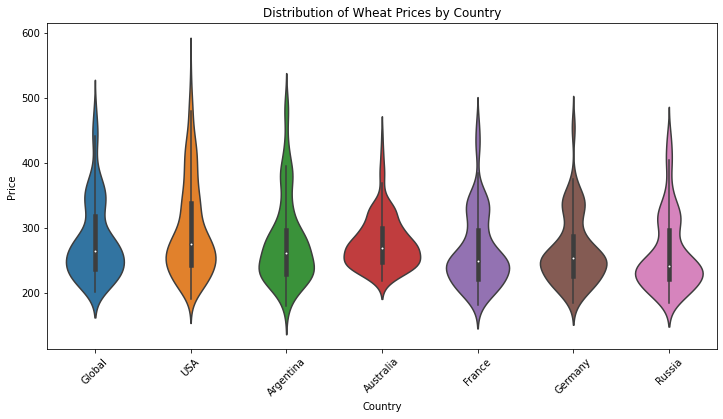

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.violinplot(data=df3, x='Country', y='Price')
plt.xticks(rotation=45)
plt.title('Distribution of Wheat Prices by Country')
plt.show()


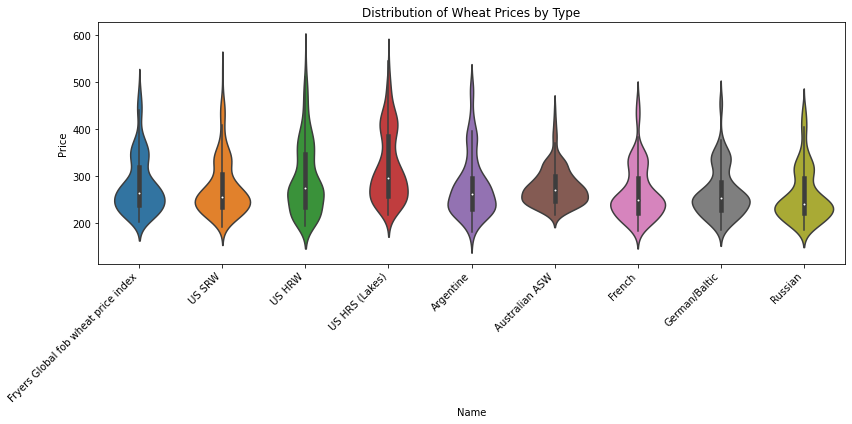

In [81]:
# Create violin plot showing price distribution by wheat type
plt.figure(figsize=(12,6))
sns.violinplot(data=df3, x='Name', y='Price')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Wheat Prices by Type')
plt.tight_layout()
plt.show()

# The violin plot shows the distribution shape of prices for each wheat type,
# with width indicating frequency at that price point

# Seaborn prompt:
# sns.violinplot(data=df3, x='Name', y='Price')


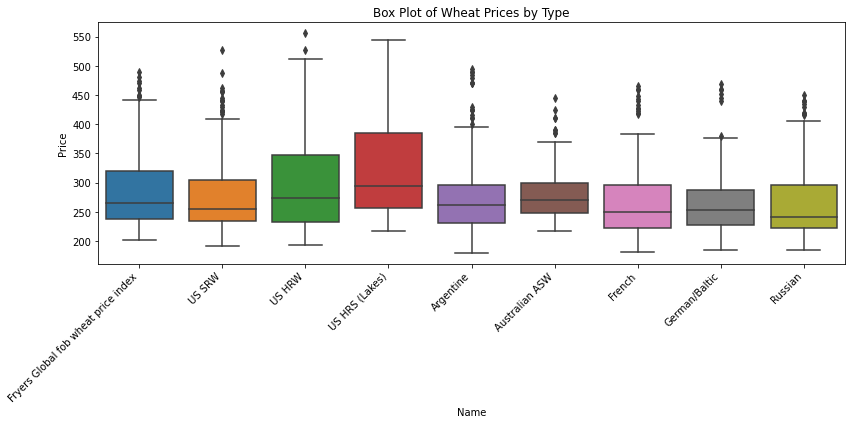

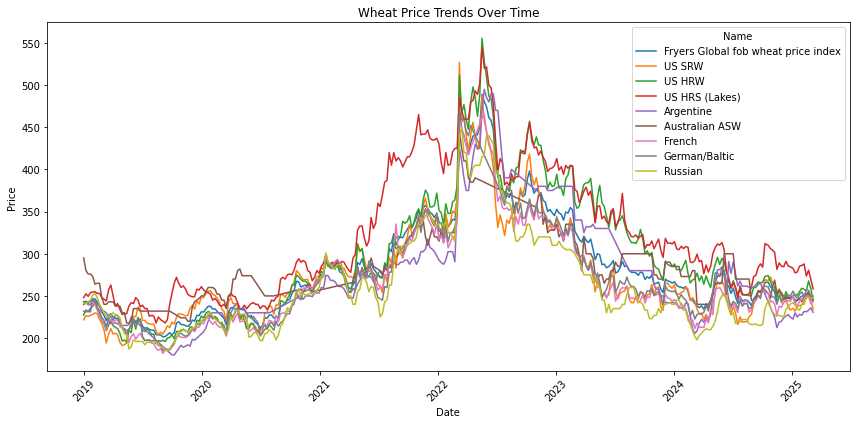

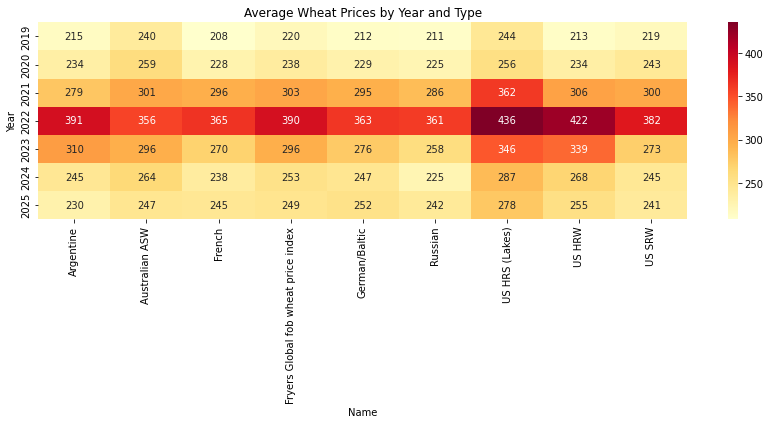

In [83]:
# Box plot shows median, quartiles and outliers for each wheat type
plt.figure(figsize=(12,6))
sns.boxplot(data=df3, x='Name', y='Price')
plt.xticks(rotation=45, ha='right')
plt.title('Box Plot of Wheat Prices by Type')
plt.tight_layout()
plt.show()

# Seaborn prompt:
# sns.boxplot(data=df3, x='Name', y='Price')

# Line plot shows price trends over time for each wheat type
plt.figure(figsize=(12,6))
sns.lineplot(data=df3, x='Date', y='Price', hue='Name')
plt.xticks(rotation=45)
plt.title('Wheat Price Trends Over Time')
plt.tight_layout() 
plt.show()

# Seaborn prompt:
# sns.lineplot(data=df3, x='Date', y='Price', hue='Name')
# Create heatmap showing average price by year and wheat type
df3['Year'] = pd.to_datetime(df3['Date']).dt.year
pivot = df3.pivot_table(values='Price', index='Year', columns='Name', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Average Wheat Prices by Year and Type')
plt.tight_layout()
plt.show()




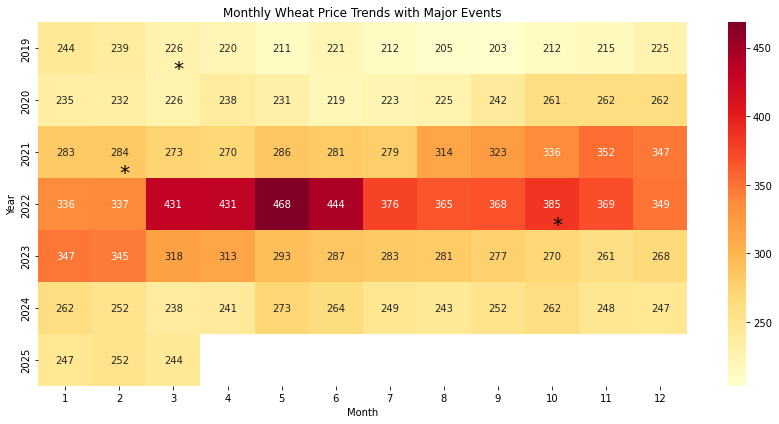

In [85]:
# Create year-month carpet plot
df3['Month'] = pd.to_datetime(df3['Date']).dt.month
df3['Year'] = pd.to_datetime(df3['Date']).dt.year

# Calculate monthly average prices
monthly_avg = df3.groupby(['Year', 'Month'])['Price'].mean().reset_index()

# Create carpet plot
plt.figure(figsize=(12,6))
pivot = monthly_avg.pivot(index='Year', columns='Month', values='Price')
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.0f')

# Add event markers
events = {
    (2020, 3): 'COVID-19',
    (2022, 2): 'Ukraine War',
    (2023, 10): 'Gaza War'
}

for (y,m), event in events.items():
    if y in pivot.index and m in pivot.columns:
        plt.text(m-0.5, pivot.index.get_loc(y), '*', fontsize=20, color='black')

plt.title('Monthly Wheat Price Trends with Major Events')
plt.xlabel('Month')
plt.ylabel('Year') 
plt.tight_layout()
plt.show()


IndexError: index 6 is out of bounds for axis 0 with size 6

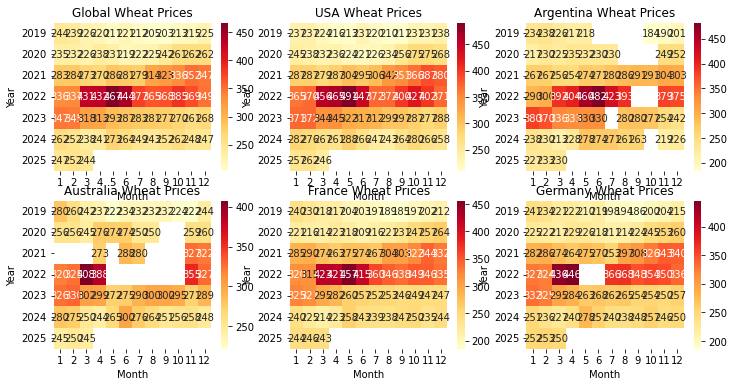

In [86]:
# Create separate carpet plots by country
countries = df3['Country'].unique()
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes = axes.ravel()

for i, country in enumerate(countries):
    country_data = df3[df3['Country'] == country]
    monthly_avg = country_data.groupby(['Year', 'Month'])['Price'].mean().reset_index()
    pivot = monthly_avg.pivot(index='Year', columns='Month', values='Price')
    
    sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.0f', ax=axes[i])
    axes[i].set_title(f'{country} Wheat Prices')
    
plt.tight_layout()
plt.show()


IndexError: index 6 is out of bounds for axis 0 with size 6

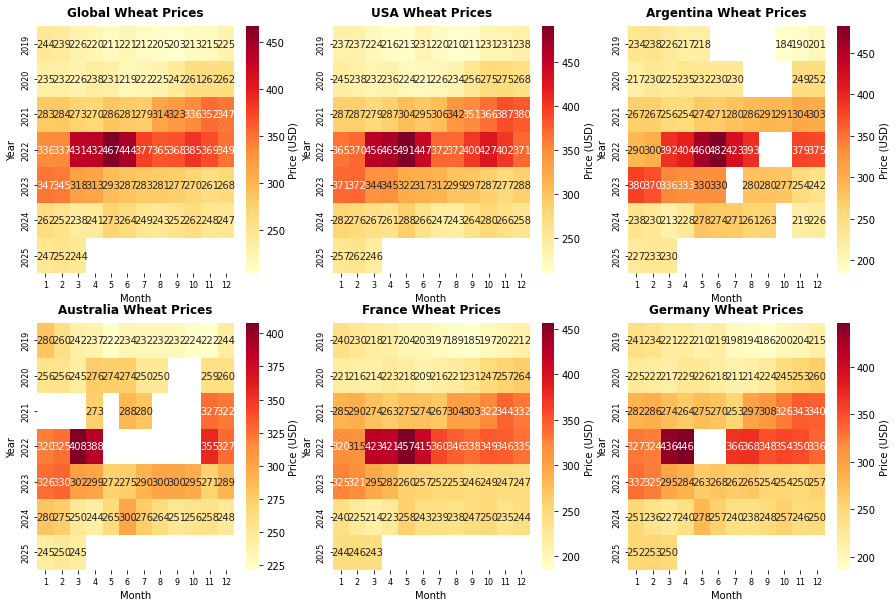

In [88]:
# Create separate carpet plots by country with improved styling
countries = df3['Country'].unique()
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.ravel()

for i, country in enumerate(countries):
    country_data = df3[df3['Country'] == country]
    monthly_avg = country_data.groupby(['Year', 'Month'])['Price'].mean().reset_index()
    pivot = monthly_avg.pivot(index='Year', columns='Month', values='Price')
    
    sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.0f', ax=axes[i], 
                cbar_kws={'label': 'Price (USD)'})
    axes[i].set_title(f'{country} Wheat Prices', pad=10, fontsize=12, fontweight='bold')
    axes[i].tick_params(labelsize=8)

plt.suptitle('Wheat Price Trends by Country', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


IndexError: index 6 is out of bounds for axis 0 with size 6

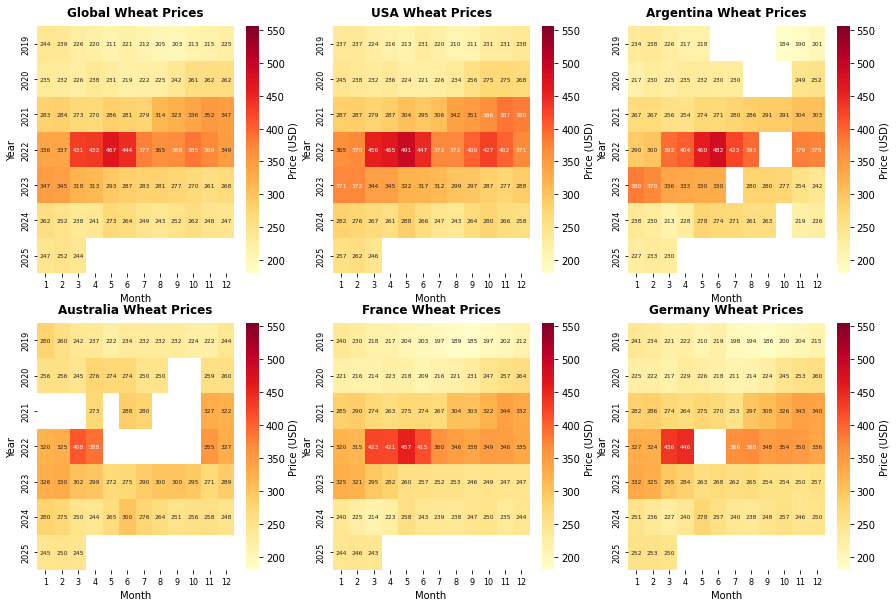

In [89]:
# Create separate carpet plots by country with uniform scale
countries = df3['Country'].unique()
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.ravel()

# Get global min/max for uniform scale
vmin = df3['Price'].min()
vmax = df3['Price'].max()

for i, country in enumerate(countries):
    country_data = df3[df3['Country'] == country]
    monthly_avg = country_data.groupby(['Year', 'Month'])['Price'].mean().reset_index()
    pivot = monthly_avg.pivot(index='Year', columns='Month', values='Price')
    
    sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.0f', ax=axes[i],
                vmin=vmin, vmax=vmax, 
                cbar_kws={'label': 'Price (USD)'},
                annot_kws={'size': 6})
    axes[i].set_title(f'{country} Wheat Prices', pad=10, fontsize=12, fontweight='bold')
    axes[i].tick_params(labelsize=8)

plt.suptitle('Wheat Price Trends by Country', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [92]:
df3.groupby('Country').agg({'Price': 'mean'}).sort_values('Price', ascending=False)

,Price
Country,
USA,297.015508
Global,281.789374
Argentina,278.212186
Australia,277.501713
Germany,265.694167
France,265.101730
Russia,260.401412


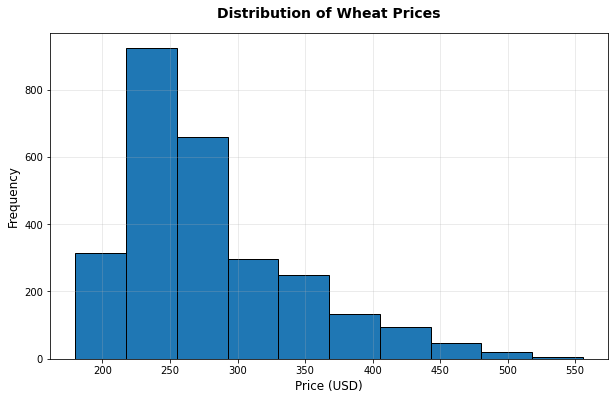

In [94]:
# Create histogram of price distribution with 5 bins
plt.figure(figsize=(10,6))
plt.hist(df3['Price'], bins=10, edgecolor='black')
plt.title('Distribution of Wheat Prices', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [95]:
# Calculate price thresholds for 5 levels based on distribution
prices = df3['Price']
min_price = prices.min()
max_price = prices.max()

# Based on the histogram distribution, setting thresholds at:
# ~220, 240, 260, 280 for relatively even groupings
thresholds = [220, 240, 260, 280]

print("Price distribution thresholds:")
print(f"Level 1: Below ${thresholds[0]}")
print(f"Level 2: ${thresholds[0]} - ${thresholds[1]}")
print(f"Level 3: ${thresholds[1]} - ${thresholds[2]}")
print(f"Level 4: ${thresholds[2]} - ${thresholds[3]}")
print(f"Level 5: Above ${thresholds[3]}")

# Calculate percentage of data in each level
level1 = (prices < thresholds[0]).sum() / len(prices) * 100
level2 = ((prices >= thresholds[0]) & (prices < thresholds[1])).sum() / len(prices) * 100
level3 = ((prices >= thresholds[1]) & (prices < thresholds[2])).sum() / len(prices) * 100
level4 = ((prices >= thresholds[2]) & (prices < thresholds[3])).sum() / len(prices) * 100
level5 = (prices >= thresholds[3]).sum() / len(prices) * 100

print("\nPercentage of data in each level:")
print(f"Level 1: {level1:.1f}%")
print(f"Level 2: {level2:.1f}%")
print(f"Level 3: {level3:.1f}%")
print(f"Level 4: {level4:.1f}%")
print(f"Level 5: {level5:.1f}%")


Price distribution thresholds:
Level 1: Below $220
Level 2: $220 - $240
Level 3: $240 - $260
Level 4: $260 - $280
Level 5: Above $280

Percentage of data in each level:
Level 1: 13.3%
Level 2: 15.8%
Level 3: 19.5%
Level 4: 12.8%
Level 5: 38.6%


In [96]:
# Iteratively adjust thresholds to get more even distribution
prices = df3['Price']
target_pct = 20  # Target percentage per level (100% / 5 levels)
max_iterations = 20
tolerance = 2  # Allow within 2% of target

for iteration in range(max_iterations):
    # Calculate percentages for current thresholds
    level1 = (prices < thresholds[0]).sum() / len(prices) * 100
    level2 = ((prices >= thresholds[0]) & (prices < thresholds[1])).sum() / len(prices) * 100
    level3 = ((prices >= thresholds[1]) & (prices < thresholds[2])).sum() / len(prices) * 100
    level4 = ((prices >= thresholds[2]) & (prices < thresholds[3])).sum() / len(prices) * 100
    level5 = (prices >= thresholds[3]).sum() / len(prices) * 100
    
    levels = [level1, level2, level3, level4, level5]
    
    # Check if all levels are within tolerance of target
    if all(abs(level - target_pct) <= tolerance for level in levels):
        break
        
    # Adjust thresholds based on percentages
    if level1 > target_pct:
        thresholds[0] -= 2
    elif level1 < target_pct:
        thresholds[0] += 2
        
    if level2 > target_pct:
        thresholds[1] -= 2
    elif level2 < target_pct:
        thresholds[1] += 2
        
    if level3 > target_pct:
        thresholds[2] -= 2
    elif level3 < target_pct:
        thresholds[2] += 2
        
    if level4 > target_pct:
        thresholds[3] -= 2
    elif level4 < target_pct:
        thresholds[3] += 2

print("Adjusted thresholds for more even distribution:")
print(f"Level 1: Below ${thresholds[0]:.1f}")
print(f"Level 2: ${thresholds[0]:.1f} - ${thresholds[1]:.1f}")
print(f"Level 3: ${thresholds[1]:.1f} - ${thresholds[2]:.1f}") 
print(f"Level 4: ${thresholds[2]:.1f} - ${thresholds[3]:.1f}")
print(f"Level 5: Above ${thresholds[3]:.1f}")

print("\nFinal percentages:")
print(f"Level 1: {level1:.1f}%")
print(f"Level 2: {level2:.1f}%")
print(f"Level 3: {level3:.1f}%")
print(f"Level 4: {level4:.1f}%")
print(f"Level 5: {level5:.1f}%")


Adjusted thresholds for more even distribution:
Level 1: Below $228.0
Level 2: $228.0 - $252.0
Level 3: $252.0 - $276.0
Level 4: $276.0 - $320.0
Level 5: Above $320.0

Final percentages:
Level 1: 21.1%
Level 2: 18.4%
Level 3: 21.3%
Level 4: 15.2%
Level 5: 24.1%
